In [44]:
# importando as bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Importando uma métrica de acerto para comparar os metodos:
from sklearn.metrics import r2_score

In [46]:
# rodando matplotlib no notebook
%matplotlib inline

In [47]:
# atribuindo a url a uma variavel 
remote_path = "https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv"

# lendo os dados csv presentes na url:
df=pd.read_csv(remote_path)

# visualização:
df.head()

Date  reference  target
0  15-01-2010       12.0    12.0
1  15-02-2010       18.0    18.0
2  15-03-2010       22.0    22.0
3  15-04-2010       26.0    26.0
4  15-05-2010       31.0     NaN

In [48]:
# convertendo date para index com o formato correto:
df.Date = pd.to_datetime(df.Date, format ='%d-%m-%Y')
df = df.set_index('Date')

# visualização:
df.head()

reference  target
Date                         
2010-01-15       12.0    12.0
2010-02-15       18.0    18.0
2010-03-15       22.0    22.0
2010-04-15       26.0    26.0
2010-05-15       31.0     NaN

In [49]:
# atribuindo os valores vazios a uma coluna separada:
df = df.assign(missing=np.nan)

In [50]:
df.missing[df.target.isna()] = df.reference

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reference  96 non-null     float64
 1   target     75 non-null     float64
 2   missing    21 non-null     float64
dtypes: float64(3)
memory usage: 3.0 KB


In [52]:
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20,10))

# Completando usando mediana ou média:

In [53]:
# criando uma coluna para cada método testado para comparar com o gráfico:
df = df.assign(FillMean=df.target.fillna(df.target.mean()))
df = df.assign(FillMedian=df.target.fillna(df.target.median()))

In [54]:
# nova visualização:
df.head()

reference  target  missing   FillMean  FillMedian
Date                                                         
2010-01-15       12.0    12.0      NaN  12.000000   12.000000
2010-02-15       18.0    18.0      NaN  18.000000   18.000000
2010-03-15       22.0    22.0      NaN  22.000000   22.000000
2010-04-15       26.0    26.0      NaN  26.000000   26.000000
2010-05-15       31.0     NaN     31.0  25.887473   23.787254

# Completando usando median ou média móveis:

In [55]:
# input usando média movel 
df = df.assign(RollingMean=df.target.fillna(df.target.rolling(24, min_periods=1).mean()))

# input unando mediana movel
df = df.assign(RollingMedian=df.target.fillna(df.target.rolling(24, min_periods=1).median()))

# Completando usando diferentes tipos de interpolação:

In [56]:
# input usando interpolação linear:
df = df.assign(InterpolateLinear=df.target.interpolate(method='linear'))

# input usando interpolação time:
df = df.assign(InterpolateTime=df.target.interpolate(method='time'))

# input usando interpolação quadratica:
df = df.assign(InterpolateQuadratic=df.target.interpolate(method='quadratic'))

# input usando interpolação cubica:
df = df.assign(InterpolateCubic=df.target.interpolate(method='cubic'))

# input usando interpolação slinear:
df = df.assign(InterpolateSLinear=df.target.interpolate(method='slinear'))

# input usando interpolação akima
df = df.assign(InterpolateAkima=df.target.interpolate(method='akima'))

# input usando interpolação polinomial
df = df.assign(InterpolatePoly5=df.target.interpolate(method='polynomial', order=5))

# input usando interpolação poolinomial com ordem maior
df = df.assign(InterpolatePoly7=df.target.interpolate(method='polynomial', order=7))

# input usando interpolação por spline
df = df.assign(InterpolateSpline3=df.target.interpolate(method='spline', order=3))

# input usando interpolação por spline com ordem maior
df = df.assign(InterpolateSpline5=df.target.interpolate(method='spline', order=4))

# input usando interpolação por spline com ordem ainda maior
df = df.assign(InterpolateSpline7=df.target.interpolate(method='spline', order=5))

In [57]:
# avaliando a pontuação de cada método:
results = [ (method, r2_score(df.reference, df[method])) for method in list(df)[3:] ]

# armazenando o resultado em um dataframe:
results_df = pd.DataFrame(np.array(results), columns=['Metodo', 'R_quadrado'])

# visualização:
results_df.sort_values(by='R_quadrado', ascending=False)

Metodo          R_quadrado
9       InterpolateAkima   0.981684100149588
5        InterpolateTime  0.9815664478940275
8     InterpolateSLinear  0.9815664478940275
4      InterpolateLinear  0.9813215759943529
6   InterpolateQuadratic     0.9663474396797
12    InterpolateSpline3  0.9633836918698976
7       InterpolateCubic  0.9633218181089737
10      InterpolatePoly5   0.954157955951024
14    InterpolateSpline7   0.951671359314308
11      InterpolatePoly7  0.9504371542313383
13    InterpolateSpline5   0.928463604189156
0               FillMean  0.7859894121335577
2            RollingMean  0.7457974578754563
1             FillMedian  0.7347827483233148
3          RollingMedian  0.6888988883243206

In [63]:
# Plotando os dados Após a imputação:
final_df = df[['reference', 'target', 'missing', 'InterpolateAkima']]
final_df.plot(style=['b-', 'ko', 'r.', 'rx-'], figsize=(20, 10))
plt.ylabel('Temperatura')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14})

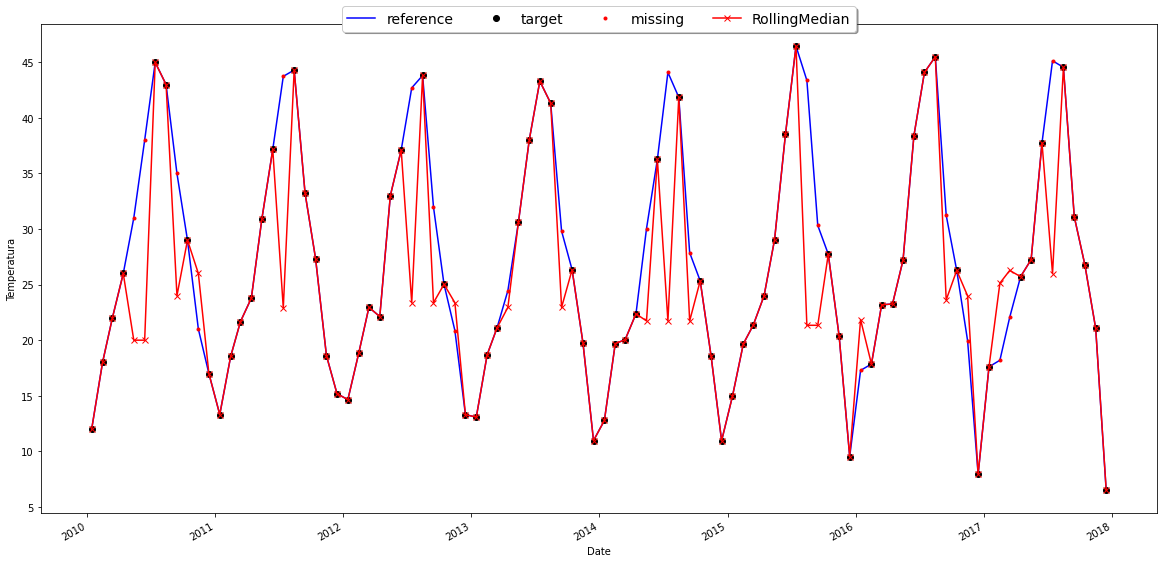

In [64]:
# Plotando os dados Após a imputação:
final_df = df[['reference', 'target', 'missing', 'RollingMedian']]
final_df.plot(style=['b-', 'ko', 'r.', 'rx-'], figsize=(20, 10))
plt.ylabel('Temperatura')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14})